In [1]:
import julia
jl = julia.Julia(compiled_modules=False)
from julia import Main
import numpy as  np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
Main.include("abc_numerics.jl")

┌ Warning: Replacing docs for `SciMLBase.sol :: Union{Tuple, Tuple{D}, Tuple{S}, Tuple{N}, Tuple{T}} where {T, N, S, D}` in module `SciMLBase`
└ @ Base.Docs docs/Docs.jl:240


<PyCall.jlwrap envStep>

In [3]:
A = 1.
B = 0.7
C = 0.43
NU = 0.99
kappa = 0.001
BETA = 0.1
PHI = 2.0

In [16]:
a = np.random.random(3)
p = np.random.random(3)
active_traj = [a]
passive_traj = [p]
for i in range(2000):
    state_string = np.array2string(np.append(p,a), separator=",")
    loc_p = np.array2string(p, separator=",")
    p,a,penalty = Main.eval(f"envStep({A},{B},{C}, {PHI}, {NU},{kappa}, {BETA},{state_string},0.05)")
    active_traj.append(a)
    passive_traj.append(p)

In [17]:
active_traj = np.array(active_traj)
passive_traj = np.array(passive_traj)

In [18]:
fig = go.Figure(data=go.Scatter3d(
        x=passive_traj[:,0],
        y=passive_traj[:,1],
        z=passive_traj[:,2],
        mode='lines',
        name = "passive trajectory"
      )
    )

fig.add_trace(go.Scatter3d(
    x=active_traj[:,0],
    y=active_traj[:,1],
    z=active_traj[:,2],
    mode='lines',
    name="Active trajectory"
))

In [7]:
fig.show()

### Now testing the environment wrapping the numerics

In [8]:
from abc_env import ABC_env

In [9]:
D = 0.06 # placeholder for now
env = ABC_env(A,B,C,0.5,BETA,kappa,D,NU)
env.deltaT = 0.05
env.limit = 50

In [10]:
p_traj = []
a_traj = []
while not env.isOver():
    p_traj.append(env.passive)
    a_traj.append(env.active)
    env.step(PHI)
env.reset()
p_traj = np.array(p_traj)
a_traj = np.array(a_traj)
    

In [11]:
fig = go.Figure(data=go.Scatter3d(
        x=p_traj[:,0],
        y=p_traj[:,1],
        z=p_traj[:,2],
        mode='lines',
        name = "passive trajectory"
      )
    )

fig.add_trace(go.Scatter3d(
    x=a_traj[:,0],
    y=a_traj[:,1],
    z=a_traj[:,2],
    mode='lines',
    name="Active trajectory"
))

### Sampling Lyapunov Exponent (Needed to determine the parameter D)

In [8]:
from scipy.optimize import curve_fit
from scipy.stats import norm

(array([0.02319352, 0.        , 0.        , 0.02319352, 0.        ,
        0.02319352, 0.04638705, 0.02319352, 0.04638705, 0.09277409,
        0.18554818, 0.02319352, 0.11596761, 0.23193523, 0.25512875,
        0.25512875, 0.30151579, 0.39428988, 0.41748341, 0.69580568,
        0.74219272, 1.04370851, 0.9277409 , 0.90454738, 1.29883726,
        1.57715953, 2.13380407, 2.04102998, 2.34254578, 2.52809396,
        3.13112554, 3.47902838, 3.10793202, 3.38625429, 3.47902838,
        3.71096361, 3.96609235, 3.78054417, 3.54860895, 4.31399519,
        4.10525349, 3.94289883, 3.87331826, 3.45583486, 3.40944781,
        3.52541543, 4.03567292, 3.59499599, 3.36306077, 2.7832227 ,
        2.50490043, 2.45851339, 1.78590124, 1.78590124, 1.80909476,
        1.34522431, 1.25245022, 1.09009556, 0.64941863, 0.7189992 ,
        0.57983806, 0.76538624, 0.53345102, 0.39428988, 0.69580568,
        0.62622511, 0.48706397, 0.39428988, 0.53345102, 0.57983806,
        0.67261215, 0.85816033, 2.1569976 , 0.48

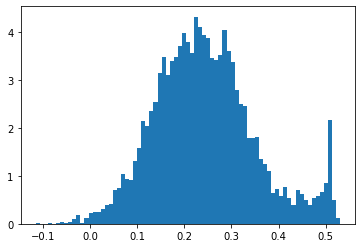

In [11]:
num_eps=5000
start_sep = 0.02*np.pi
sampled_lambdas=[]
t_end = 10.
delta_t = 0.01
PHI=0.
for ep in range(num_eps):
    a = (np.random.random(3)-0.5)*2*np.pi
    sep_vec = np.random.random(3)-0.5
    sep_vec = (sep_vec/np.linalg.norm(sep_vec)) * start_sep
    p = a + sep_vec


    for i in range(int(t_end/delta_t)):
        state_string = np.array2string(np.append(p,a), separator=",")
        p,a,penalty = Main.eval(f"envStep({A},{B},{C}, {PHI}, {NU},{kappa}, {BETA},{state_string},{delta_t})")

        
    final_sep = np.linalg.norm(p-a)
    sampled_lambdas.append((np.log(final_sep/start_sep))/t_end)

    
plt.hist(sampled_lambdas,bins=75,density=True)
    #TODO
    # grab final sep after x time
    # calc lyapunov exponent
    # save in the sampled values and continue

(array([0.02319352, 0.        , 0.        , 0.02319352, 0.        ,
        0.02319352, 0.04638705, 0.02319352, 0.04638705, 0.09277409,
        0.18554818, 0.02319352, 0.11596761, 0.23193523, 0.25512875,
        0.25512875, 0.30151579, 0.39428988, 0.41748341, 0.69580568,
        0.74219272, 1.04370851, 0.9277409 , 0.90454738, 1.29883726,
        1.57715953, 2.13380407, 2.04102998, 2.34254578, 2.52809396,
        3.13112554, 3.47902838, 3.10793202, 3.38625429, 3.47902838,
        3.71096361, 3.96609235, 3.78054417, 3.54860895, 4.31399519,
        4.10525349, 3.94289883, 3.87331826, 3.45583486, 3.40944781,
        3.52541543, 4.03567292, 3.59499599, 3.36306077, 2.7832227 ,
        2.50490043, 2.45851339, 1.78590124, 1.78590124, 1.80909476,
        1.34522431, 1.25245022, 1.09009556, 0.64941863, 0.7189992 ,
        0.57983806, 0.76538624, 0.53345102, 0.39428988, 0.69580568,
        0.62622511, 0.48706397, 0.39428988, 0.53345102, 0.57983806,
        0.67261215, 0.85816033, 2.1569976 , 0.48

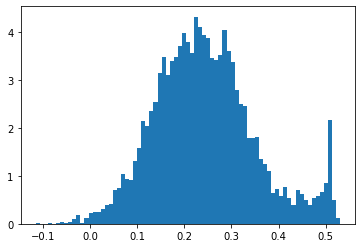

In [12]:
plt.hist(sampled_lambdas,bins=75,density=True)

In [13]:
mu, sigma = norm.fit(sampled_lambdas)

For t_end=10

In [14]:
mu

0.24401105557848032

For t_end=5

In [10]:
mu

0.32019614150133185